# Introduction
This is part 2 of the [Data Journalism Workflow tutorial  series](https://www.kaggle.com/iamleonie/data-journalism-workflow).
In this notebook you will learn how to explore the data and gain as much insight as possible from it. 

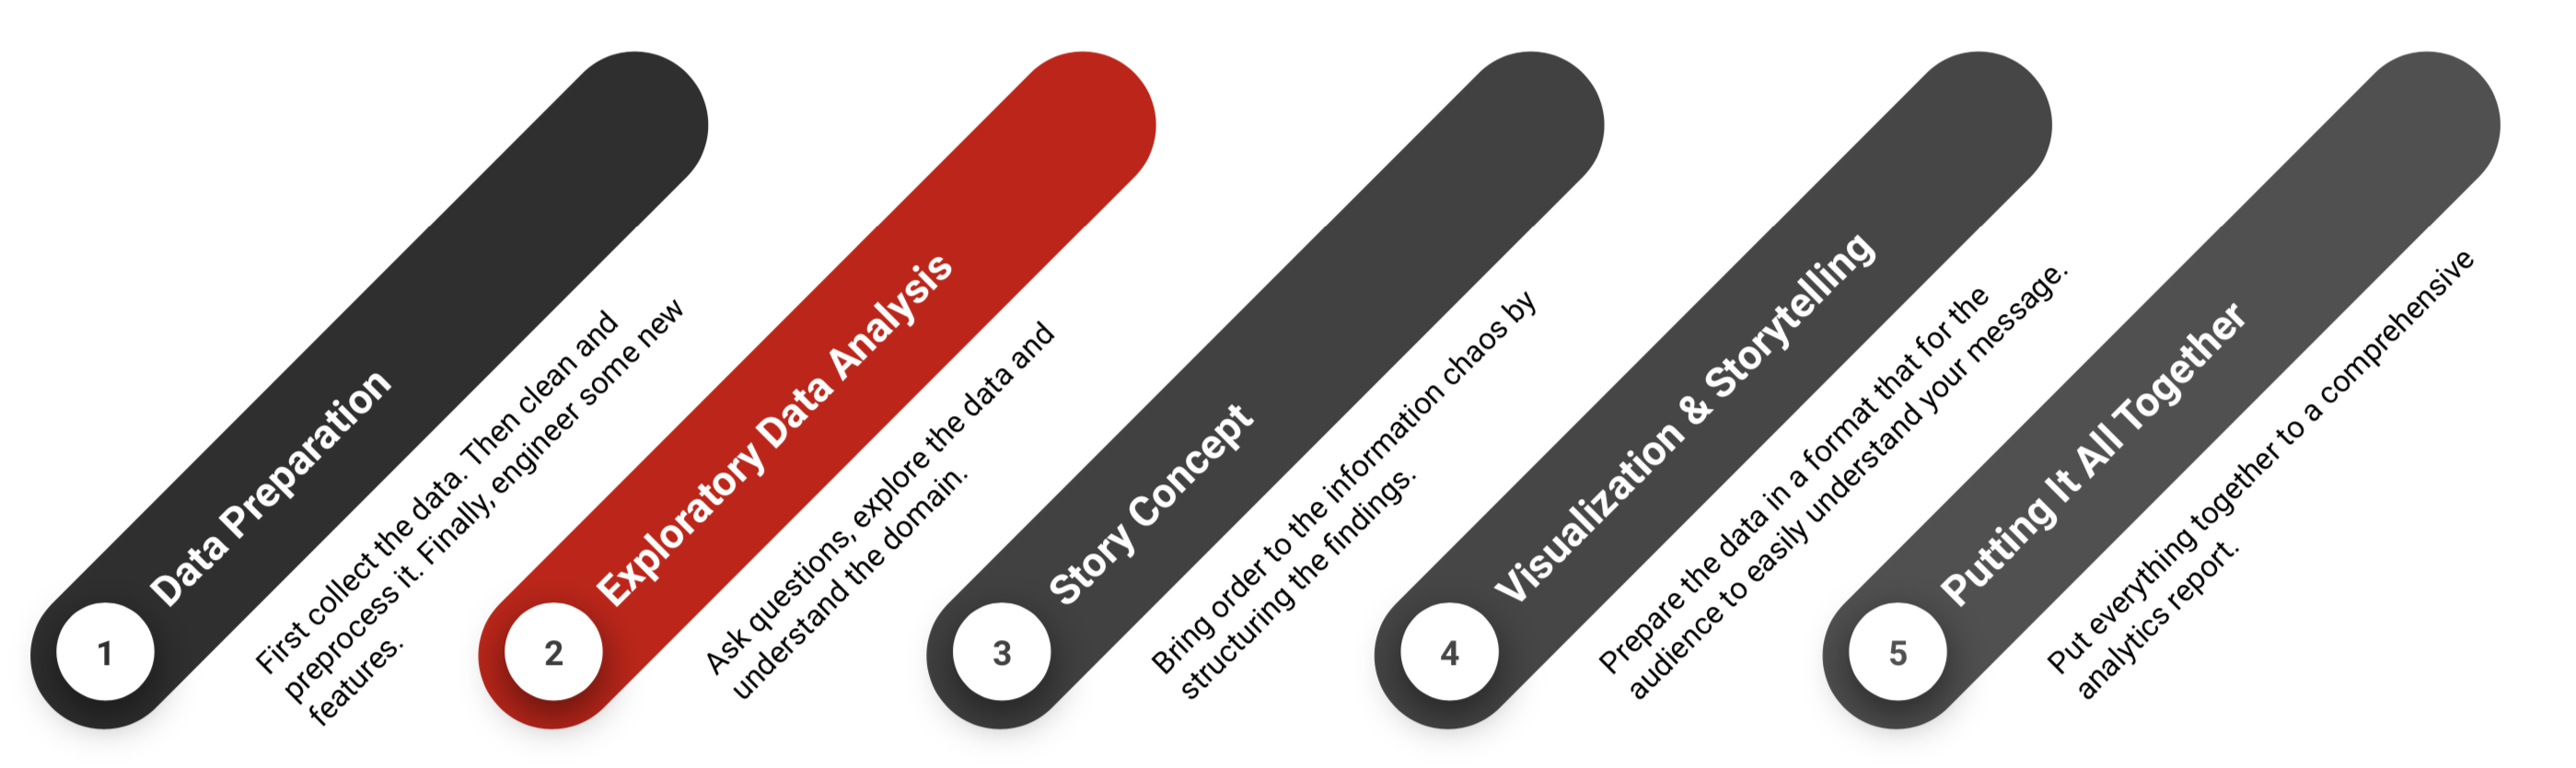

Now begins the fun part! We will start to explore the data by visualizing it. The goal of this part is to learn about the characteristics of each feature and its relationship to other features. Additionally, we will check if the data makes sense, if there are outliers, and everything else that might catch our attention. Also, you will learn that data cleaning and processing is an iterative part through out this workflow.

- [Feature Characteristics](#Feature-Characteristics)
    - [Categorical Features](#Categorical-Features)
    - [Numerical Features](#Numerical-Features)
    - [Text Features](#Text-Features)
- [Relationships](#Relationships)


**The most important message in my opinion is to not just visualize the data. Instead take a few minutes to look at your visualization and think about what the data is telling you.** I recommend you take some notes of your findings.

For the visualizations, we will be using the libraries `matplotlib` and `seaborn`. Feel free to use any other library, such as `plotly` as well. 

Here is a quick collection of the most commonly used plot types:
* For single features' characteristics
    * histograms
    * density plots
    * box plots
    * count plots
* For relationships
    * scatter plots
    * line plots
    * (stacked) bar charts
    * heat maps
    * kdeplots

    
Notice, how I did not list pie charts? Pie charts have a bad reputation since they often distort the information and make it more difficult to understand the underlying message. I **recommend to avoid pie charts and to try a stacked bar chart instead**.

This is also the right time to **ask a lot of questions**:
* Who
* What
* Where
* When
* Why
* How

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from wordcloud import WordCloud, STOPWORDS# Generate word cloud

import warnings
warnings.filterwarnings("ignore")

We will load the preprocessed data from [part 1](https://www.kaggle.com/iamleonie/data-journalism-data-preparation-1-5) of this series. The .csv file contains only netflix TV shows and is the cleaned and preprocessed data with a few additional features.

In [ ]:
netflix_shows = pd.read_csv('../input/data-journalism-data-preparation-1-5/netflix_shows.csv')
netflix_shows.head()

# Feature Characteristics
First we will look at each individual feature. Here we will start with some surface level questions:
- Is the feature categorical or numerical?
- Is the feature continuous or discrete?
- How many unique values does the feature have?
- What are the minimum and maximum values?
- What are the most and least common values?
- What is the overall distribution of the feature?
- Are there any implausible datapoints? Are these outliers or mislabelled datapoint?

## Categorical Feature
For **categorical features** you can start with a simple console output with the `.value_counts()` function, which lists the amount a category in that column appears. Alternatively, you can use a `countplot` to visualize the same information as a plot.

### Rating

In [ ]:
netflix_shows["rating"].value_counts()

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(netflix_shows["rating"], palette='Reds')
plt.show()

This is also a good time to get more familiar with the topic. For example, we could check what the rating categories mean. The rating categories have the following meaning:
* TV-Y: 2-6 years
* TV-Y7: >= 7 year
* TV-G: all ages
* TV-PG: parental guidance
* TV-14: >= 14 years
* TV-MA: mature adult

With this background information and the above feature representations, we can quickly summarize our observations:

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>The most common rating is TV-MA, followed by TV-14 and TV-PG. This means that the majority of TV shows are intended for more mature audiences.</li>
  <li>Rating R and TV-Y7-FV seem to be mislabeled data points</li>
  <li>Rating NR could be the result of imputed missing ratings and mean "not rated"</li>
  <li>The least common rating is TV-G, followed by TV-Y and TV-Y7. These are the ratings for younger audiences.</li>
</ul> 
</div>


This is a nice example of the **iterative process** of the data analysis workflow is because now we have to tidy up the rating column in addition to the previously conducted data cleaning steps.

After the clean up, the feature `rating` looks as follows:

In [ ]:
# Clean up ratings by replacing them with plausible counterparts
netflix_shows.rating = netflix_shows.rating.replace({"TV-Y7-FV" : "TV-Y7", "R" : "TV-MA"})

fig = plt.figure(figsize=(10,6))
sns.countplot(netflix_shows["rating"], palette='Reds')
plt.show()

---

### Added Date
Not all features that are numbers necessarily have to handled as numerical features. Numerical features with a low cardinality (low number of unique values in feature) can also be handled as categorical features. For example, the feature `date_added_weekday`. Although this feature has the datatype integer howevery due to the fact that there are only seven unique days in a week

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))
sns.countplot(netflix_shows["date_added_weekday"], palette='Reds', ax=ax[0])
sns.countplot(netflix_shows["date_added_day"], palette='Reds', ax=ax[1])
sns.countplot(netflix_shows["date_added_month"], palette='Reds', ax=ax[2])

plt.show()

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>There are seven days in a week with Monday being represented by 0 and Sunday being represented by 6</li>
  <li>Most TV shows are added on Fridays</li>
  <li>Fewer TV shows are added on Monday and the weekends</li>       
  <li>Most TV shows are added on the first or the 15th of a month</li>
  <li>Most TV shows are added in December</li>
  <li>The least TV shows are added in February</li>
</ul> 
</div>

---

### Director

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('director')]].sum(axis=0).sort_values(ascending=False))

netflix_shows.drop("director_Unknown", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>Ken Burns and Alastair Fothergill are the only directors to have directed three TV shows on Netflix</li>
  <li>For the majority of TV shows on Netflix the director is unknown in this dataset. We could drop this column.</li>
  <li>There are 228 unique directors</li>
  <li>The majority of directors have directed one TV show on Netflix</li>
</ul> 
</div>

---

### Country

In [ ]:
temp = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('country')]].sum(axis=0).sort_values(ascending=False).to_frame().reset_index()
temp.columns = ['country', 'number_tv_shows']

fig, ax = plt.subplots(1, 1, figsize=(16,6))

sns.barplot(data=temp[temp.number_tv_shows > 20], x='country', y='number_tv_shows', palette='Reds')

for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(90) 
plt.show()

most_common_countries = temp[temp.number_tv_shows > 20].country.values
most_common_countries = [c for c in most_common_countries if c != 'country_Unknown']

netflix_shows.drop("country_Unknown", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>There are 66 countries in which Netflix TV shows are available</li>
  <li>The most TV shows are available in the United States of America, which makes sense since Netflix was founded there</li>
  <li>For a lot of TV shows the country is unknown. We could remove this column.</li>
  <li>The second most TV shows are available in the United Kingdom, followed by Japan and South Korea</li>
</ul> 
</div>

---

### Cast

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('cast')]].sum(axis=0).sort_values(ascending=False))

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>There are over 13,000 actors starring in Netflix TV shows</li>
  <li>Actors starring in the most TV shows are all Japanese</li>
</ul> 
</div>

---

### Category

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum(axis=0).sort_values(ascending=False))

temp = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum(axis=1)
sns.countplot(temp, palette='Reds');

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
         <li>There are over 22 categories for Netflix TV shows</li>
         <li>The most common category is "International TV Shows"</li>
         <li>The category "TV Shows" seems to be a filler for unknown category. We could drop this column.</li>
         <li>The least common category is "Classic & Cult TV"</li>
         <li>A TV show is listed in at least one category. Roughly half of all TV shows on Netflix are listed in three categories.</li>
         <li>Some categories describe the origin instead of the content such as "British TV Shows", "International TV Shows", "Korean TV Shows", "Spanish Language TV Shows"</li>
         <li>Some categories describe the audience instead of the content such as "Kid's TV" and "Teen TV Shows"</li>
</ul> 
</div>

---

In [ ]:
netflix_shows.drop("listed_in_TVShows", axis=1, inplace=True)

category_cols = ['listed_in_AnimeSeries', 
                 'listed_in_Classic&CultTV', 
                 'listed_in_CrimeTVShows',
                 'listed_in_Docuseries', 
                 'listed_in_RealityTV',
                 'listed_in_RomanticTVShows', 
                 'listed_in_Science&NatureTV',
                 'listed_in_Stand-UpComedy&TalkShows', 
                 'listed_in_TVAction&Adventure',
                 'listed_in_TVComedies', 
                 'listed_in_TVDramas', 
                 'listed_in_TVHorror',
                 'listed_in_TVMysteries', 
                 'listed_in_TVSci-Fi&Fantasy',
                 'listed_in_TVThrillers',
                 "listed_in_Kids'TV"]

display(netflix_shows[category_cols].sum(axis=0).sort_values(ascending=False))

temp = netflix_shows[category_cols].sum(axis=1)
sns.countplot(temp, palette='Reds');

temp = netflix_shows[category_cols].corr()

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
sns.heatmap(temp, cmap=plt.cm.get_cmap('RdGy').reversed(), vmin=-0.5, vmax=0.5)#, annot=True)
plt.show()

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
If we remove the categories "TVShow", "British TV Shows", "International TV Shows", "Korean TV Shows", "Spanish Language TV Shows", "Teen TV Shows", we find the following:
     <ul>
         <li>There are 14 TV shows without any category </li>
         <li>The most common category is "TV Dramas"</li>
         <li>The least common category is "Classic & Cult TV"</li>
         <li>A TV show is listed in at least one category. Most TV shows on Netflix are listed in one category.</li>
         <li>"Docuseries" and "Science&Nature TV" are highly correlated as well as "TV Action & Adventure" and "TV Sci-Fi&Fantasy" and also "TV Horror" and "TV Mysteries"</li>
         <li>"TV Dramas" is negatively correlated with "Docuseries" and "Kid's TV</li>
</ul> 
</div>

---

## Numerical Features

For numerical features, we can plot the distributions in a few different ways: You can use `.histplot()` from the seaborn library to plot histograms or `.kdeplot()` to plot the kernel density estimate (KDE). Both are ways to quickly get an understanding of the features distribution. Additionally, you can use `.boxplot()` to plot the box plot and detect outliers.

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))

sns.histplot(netflix_shows.first_release_year, ax=ax[0], bins=50, color="#E50914")
ax[0].set_title('.histplot()')

sns.kdeplot(netflix_shows.first_release_year, ax=ax[1], color="#E50914")
ax[1].set_title('.kdeplot()')

sns.boxplot(netflix_shows.first_release_year, ax=ax[2], color="#E50914")
ax[2].set_title('.boxplot()')

plt.show()

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>Since the 2000s the number of TV shows has been growing almost exponentially</li>
  <li>The world's first television stations first started appearing in the United States of America in the late 1920s and early 1930s. There are no TV shows with an earlier first release year before 1920.</li>
</ul> 
</div>

Interestingly according to [Netflix](https://about.netflix.com/en), the idea for Netflix was already born in 1997 and the website netflix.com was launched  in 1998. However, streaming was not introducted until 2007. Before 2007, Netflix was renting DVDs by mail to people's homes. This explains, why there is no data available before 2008 in this dataset.
Furthermore, we can see a gap between 2008 and 2013, where no TV shows were added.

In [ ]:
# Remove missing values maked with 1800
#display(netflix_shows.date_added_year[netflix_shows.date_added_year != 1800].value_counts())
fig = plt.figure(figsize=(10,6))
sns.histplot(netflix_shows.date_added_year[netflix_shows.date_added_year != 1800], color="#E50914")
plt.show()

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>The amount of added TV shows has been steadily increasing over the past five years</li>
  <li>Since we are in the beginning of 2021 as of this writing, there are not many TV shows added sofar in 2021.</li>
</ul> 
</div>

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(netflix_shows.time_first_release_to_netflix[netflix_shows.date_added_year != 1800], color="#E50914", bins=50)
plt.show()

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>The majority of TV shows are added close to their release</li>
  <li>However, since Netflix has not been around for many decades, there are TV shows with more than 15 years between their first release and their addition to the Netflix library</li>
</ul> 
</div>

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(netflix_shows.duration, color="#E50914")
plt.show()

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
  <li>The majority of TV shows only have one season/li>
  <li>The most seasons a TV show on Netflix has is 16</li>
</ul> 
</div>

## Text Data

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15))

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_title')]].sum(axis=0).sort_values(ascending=False).head(15))

# Relationships
In this section, we will explore some relationships between the features. However, since looking at every possible relationship between the available features would take a lot of time, it is recommended to focus our attention on a specific direction. If you don't have a specific hypothesis or question in mind, you can go back through your findings and start asking more questions with more depth. This means, that **during the first data analysis, we have asked a lot of "what" questions. Now it is time to ask "how" and "why".**

This is a good point to start asking more specific questions, such as:
* How are the rating and the category correlated?
* Why are TV shows added at specific times (on Fridays, on the 1st or the 15th, during winter months)
* How do countries differ in category / rating preferences between countries?
* Are there any relationships between cast and director within countries?
* Can we see any trend over the past years regarding popularity of TV show types?
* What differentiates a TV show with 16 seasons from one with only 1 season?
* How do ratings/categories differ in their title/descriptions?


In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(24, 24))

j = 0
k = -1
for i, cat in enumerate(category_cols):

    j = (i % 4)
    if j == 0:
        k=k+1
    temp = netflix_shows[netflix_shows[cat] == 1][most_common_countries].sum(axis=0).sort_values(ascending=False).head(5).to_frame().reset_index()
    temp.columns = ['country', 'amount']
    sns.barplot(data=temp, 
                x='country', 
                y='amount', 
               palette='Reds', ax=ax[k,j])
    ax[k,j].set_title(cat)
    for tick in ax[k,j].xaxis.get_major_ticks():
        tick.label.set_rotation(90) 
    


plt.tight_layout()

<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
          <li>Japan has the most anime TV shows</li>
          <li>For most categories, United States is the country with most TV shows since the United States also has the most TV shows in general</li>
         <li>Romantic TV shows are more popular in Asia than in other countries.</li>
</ul> 
</div>

In [ ]:
fig, ax = plt.subplots(4, 5, figsize=(24, 24))

j = 0
k = -1
for i, country in enumerate(most_common_countries):

    j = (i % 5)
    if j == 0:
        k=k+1
    temp = netflix_shows[netflix_shows[country] == 1][category_cols].sum(axis=0).sort_values(ascending=False).head(5).to_frame().reset_index()
    temp.columns = ['category', 'amount']
    sns.barplot(data=temp, 
                x='category', 
                y='amount', 
               palette='Reds', ax=ax[k,j])
    ax[k,j].set_title(country)
    for tick in ax[k,j].xaxis.get_major_ticks():
        tick.label.set_rotation(90) 
    


plt.tight_layout()

In [ ]:
country_cols = netflix_shows.columns[netflix_shows.columns.str.startswith('country')].values

display(netflix_shows[netflix_shows.listed_in_KoreanTVShows == 1][country_cols].sum(axis=0).sort_values(ascending=False).head(10))

display(netflix_shows[netflix_shows.listed_in_BritishTVShows == 1][country_cols].sum(axis=0).sort_values(ascending=False).head(10))

display(netflix_shows[netflix_shows['listed_in_Spanish-LanguageTVShows'] == 1][country_cols].sum(axis=0).sort_values(ascending=False).head(10))


We will use a heatmap style to visualize the how different TV show categories are rated. Let's do a few quick sanity checks:
* `listed_in_Kids'TV` has no TV-14 and no TV-MA rating, which are intended for older audiences 
* `listed_in_TVHorror` has mostly TV-14 and TV-MA rating  
* `listed_in_TVThrillers` one has one entry with TV-Y and two with TV-Y7 

Overall the categories and ratings seem plausible. However, the last **sanity check seems off and it is important to at least check if this is ok or not**. A closer look at the last point reveals that these are in fact TV shows intended for children that are thrilling. That seems to be alright from my point of view and we will continue.

In [ ]:
## Relationsships
temp = netflix_shows.groupby('rating')[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum().T
temp = temp[['NR', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG',  'TV-14','TV-MA', ]]
display(temp.style.background_gradient(cmap='Reds', vmin=0, vmax=100).format("{:.0f}").set_caption('Number Training Pathes per Floor for Buildings in Test Set'))

display(netflix_shows[(netflix_shows.listed_in_TVThrillers == 1) & ((netflix_shows.rating == "TV-Y") | (netflix_shows.rating == "TV-Y7"))])

In [ ]:
temp = netflix_shows[netflix_shows.date_added_year != 1800].groupby('date_added_year').date_added_weekday.value_counts().to_frame()
temp.columns = ['weekday_count']
temp.reset_index(drop=False, inplace=True)
temp = temp.pivot(index='date_added_year', columns='date_added_weekday').weekday_count
temp.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")#.set_caption('Number Training Pathes per Floor for Buildings in Test Set')


<div class="alert alert-block alert-danger">
<b>Findings:</b> 
     <ul>
          <li>Most TV shows are added on Fridays (weekday 4)</li>
          <li>There is an increase of TV shows added on Wednesdays (weekday 2) in 2020, which is confirmed by <a href="https://screenrant.com/netflix-movies-release-dates-wednesday-not-friday-reason/">this article</a></li>
</ul> 
</div>


--- 
Let's explore how TV dramas, which is the most common category, differs across different regions. 

For this we will look at the most common words in the description. We will group the countries by following regions:
- Indian TV dramas: India
- Spanish TV dramas: Spain, Mexico, Colombia
- U.S. TV dramas: United States
- Asian TV dramas: Japan, South Korea, Taiwan, China

In [ ]:
def get_wordcloud_from_df(df):
    text = []
    for i in range(len(df)):

        word = df.index[i].split('dtm_descr_')[1]

        for j in range(df.iloc[i]):
            text = text + [word]

    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', 
                      colormap='Reds', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(', '.join(text))
    
    return wordcloud

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & (netflix_shows.country_India == 1)][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[0,0].imshow(wordcloud) 
ax[0,0].axis("off");
ax[0,0].set_title('Indian TV Dramas')

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & ((netflix_shows.country_Japan == 1)  | (netflix_shows.country_SouthKorea == 1)| (netflix_shows.country_China == 1)| (netflix_shows.country_Taiwan == 1))][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[0,1].imshow(wordcloud) 
ax[0,1].axis("off");
ax[0,1].set_title('Asian TV Dramas')

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & (netflix_shows.country_UnitedStates == 1)][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[1,0].imshow(wordcloud) 
ax[1,0].axis("off");
ax[1,0].set_title('U.S. TV Dramas')

temp = netflix_shows[(netflix_shows.listed_in_TVDramas == 1) & ((netflix_shows.country_Spain == 1)  | (netflix_shows.country_Colombia == 1)| (netflix_shows.country_Mexico == 1))][netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15)
wordcloud = get_wordcloud_from_df(temp)
ax[1,1].imshow(wordcloud) 
ax[1,1].axis("off");
ax[1,1].set_title('Spanish TV Dramas')

plt.show()

---
Which TV sho is listed in the most countries?

In [ ]:
netflix_shows['n_listed_countries'] = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('country')]].sum(axis=1)
sns.countplot(netflix_shows['n_listed_countries'], palette='Reds');
plt.show()

netflix_shows[['title', 'n_listed_countries']].sort_values(by = 'n_listed_countries', ascending=False).head(15).style.set_caption('TV Shows listed in most countries')

In [ ]:
"""temp = netflix_shows[(netflix_shows.date_added_year != 1800) & netflix_shows.country.isin(netflix_shows.country.value_counts().head(20).index)].groupby('date_added_year').country.value_counts().to_frame()
temp.columns = ['country_count']
temp.reset_index(drop=False, inplace=True)
temp = temp.pivot(index='date_added_year', columns='country').country_count.T
temp.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")#.set_caption('Number Training Pathes per Floor for Buildings in Test Set')
"""

In [ ]:
[# 'director',  
# 'country',
 #'rating',
 #'date_added_month', 
 #'date_added_day',
 #'date_added_weekday', 
# 'cast',
   # 'listed_in', 
 'description', 'dtm_description', 
    'title','dtm_title',
   # 'date_added_year', 
    #'first_release_year',
   # 'time_first_release_to_netflix'
 # 'duration',
 ]

## 🚀 Let's continue with [Lesson 3: Story Concept](http://www.kaggle.com/iamleonie/data-journalism-story-concept-3-5)

In [ ]:
# Save current state to output
netflix_shows.to_csv("netflix_shows.csv", index=False)